<a href="https://colab.research.google.com/github/JittikanN/deepLearningHomework/blob/main/wine_quality_notoversp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Wines Type and Quality Classification Exercises**

**Objective** 
*   To compare multiclass classification predictions on Wine quality (Low-Mid-High) using Machine Learning algorithms and Neural Network.

**Dataset** 
*   The dataset was downloaded from the UCI Machine Learning Repository. 
*   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine and combined with randomly removed of few values. 
Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). 
*   This dataset is public available for research purposes only, for more information, read [Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine5.pdf).
*   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available.(e.g. there is no data about grape types, wine brand, wine selling price, etc.).

**Attribute Information:**
*   Input variables (based on physicochemical tests):
> 1.  fixed acidity
> 2.  volatile acidity
> 3.  citric acid
> 4. residual sugar
> 5. chlorides
> 6. free sulfur dioxide
> 7. total sulfur dioxide
> 8. density
> 9. pH
> 10. sulphates
> 11. alcohol
*   Output variable (based on sensory data):
> 12. quality (score between 0 and 10)

**UCI Notes About the Dataset:**
*   The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones).
*   Outlier detection algorithms could be used to detect the few excellent or poor wines.
*   Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Dataset Acknowledgements:**
*   P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



#1). Importing Library & Import Data

In [ ]:
##Import Library
#Data analysis
import numpy as np
import pandas as pd
import time
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#Machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

1.1) Data Cleaning

In [ ]:
#Load Data
df_alldata = pd.read_csv('https://raw.githubusercontent.com/pakkardkaw/deepLearningHomework/main/winequalityN.csv')

df_alldata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df_alldata.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df_alldata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
#Clean Data
#Missing Values Data Analysis

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

#Check missing values
missingdata(df_alldata)

,Total,Percent
fixed acidity,10,0.153917
pH,9,0.138525
volatile acidity,8,0.123134
sulphates,4,0.061567
citric acid,3,0.046175
residual sugar,2,0.030783
chlorides,2,0.030783




*   There are null values in total 7 out of 11 input variables. All of null values percentage is less than 0.2%. 
*   With very small percentage, these null values can be dropped.



In [ ]:
df_alldata=df_alldata.dropna(axis=0)
df_alldata.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##1.2) Data Preparaton: Encoding Catagoring data

In [ ]:
#Encode Catagorical data
df_alldata['type']=df_alldata['type'].map({ 'white':0,'red':1})

In [ ]:
df_alldata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 2). Exploratory Data Analysis (EDA)

Wine Type
white: 0 75.35 % of the dataset
red: 1 24.65 % of the dataset


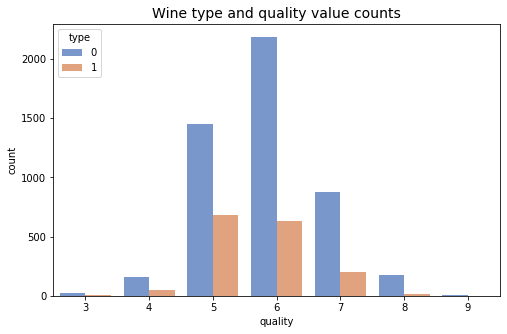

In [ ]:
#Percentage of wine types in dataset
print('Wine Type')
print('white: 0', round(df_alldata['type'].value_counts()[0]/len(df_alldata) * 100,2), '% of the dataset')
print('red: 1', round(df_alldata['type'].value_counts()[1]/len(df_alldata) * 100,2), '% of the dataset')

#Wine quality and type distribution plot - Check if data is imbalanced or not
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'quality', hue = 'type', data = df_alldata, palette='muted', alpha=0.8)
plt.title('Wine type and quality value counts', fontsize = 14)
plt.show()


*   Distribution plot of wine quality by their types above confirms the imbalanceness in both wine type and quality, especially the cases that the wine quality > 7.

In [ ]:
##Create the quality label based on the quality score (Low: <=5, Medium: 6-7, High: >7)
df_alldata['quality'] = df_alldata.quality.apply(lambda q: 0 if q <= 5 else 1 if q < 7 else 2)
df_alldata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


Wine Quality Group
Low: 0 36.7 % of the dataset
Medium: 1 43.63 % of the dataset
High: 2 19.67 % of the dataset


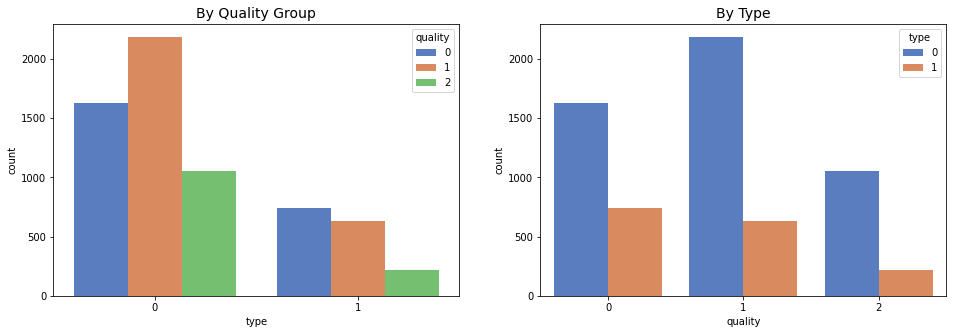

In [ ]:
#Percentage of wine quality labels in dataset
print('Wine Quality Group')
print('Low: 0', round(df_alldata['quality'].value_counts()[0]/len(df_alldata) * 100,2), '% of the dataset')
print('Medium: 1', round(df_alldata['quality'].value_counts()[1]/len(df_alldata) * 100,2), '% of the dataset')
print('High: 2', round(df_alldata['quality'].value_counts()[2]/len(df_alldata) * 100,2), '% of the dataset')

f, axes = plt.subplots(ncols=2,figsize=(16,5))
sns.countplot(x = 'type', hue = 'quality', data = df_alldata, palette='muted', ax=axes[0])
axes[0].set_title('By Quality Group', fontsize = 14)
ax2 = sns.countplot(x = 'quality', hue = 'type', data = df_alldata, palette='muted', ax=axes[1])
axes[1].set_title('By Type', fontsize = 14)
plt.show()



*   After grouping wine qualities into 3 groups (Low (<=5), Medium (6-7), High (>7)), dataset is still imbalance. We will oversampling the dataset by wine quality group prior to ML and NN.



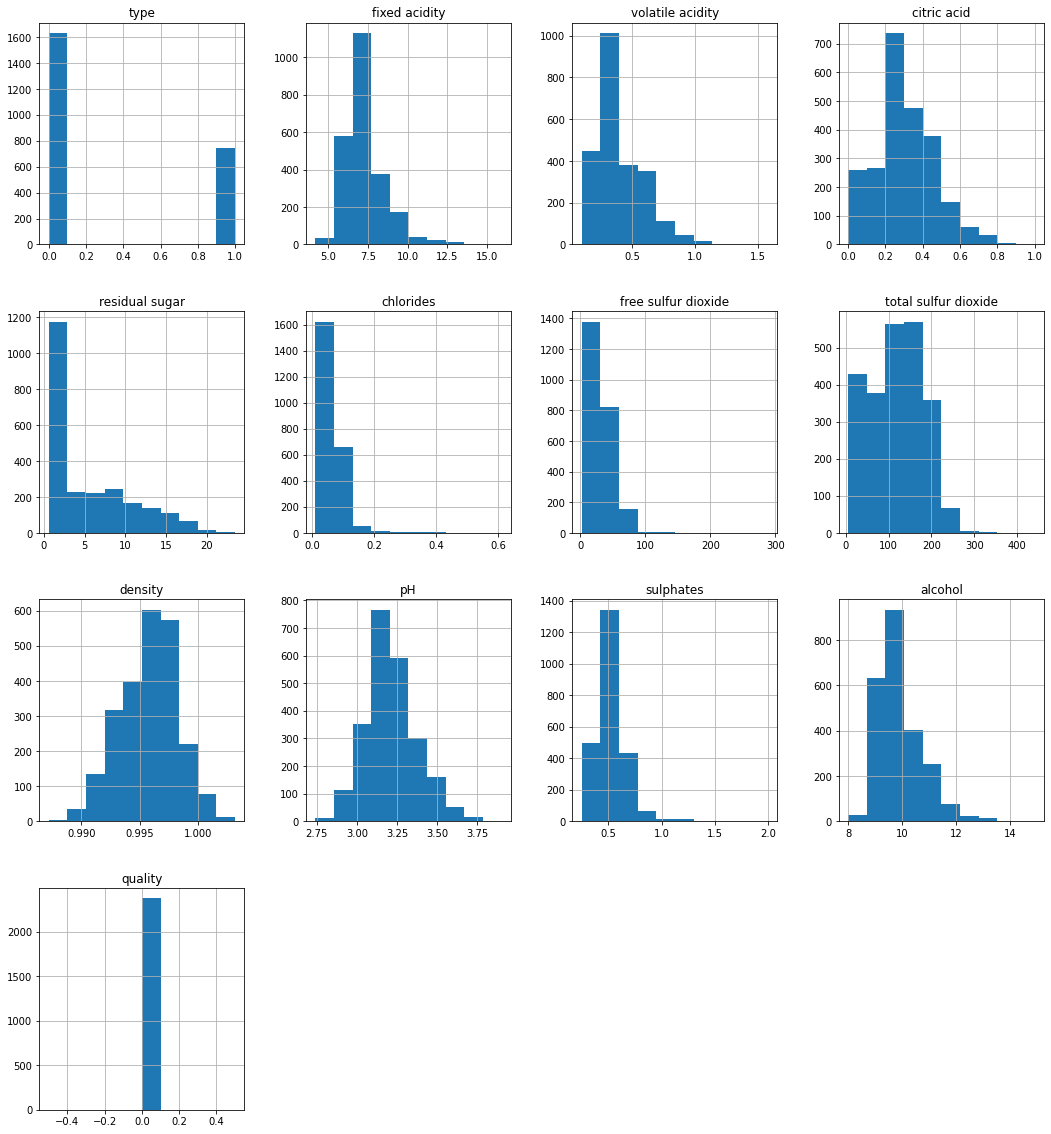

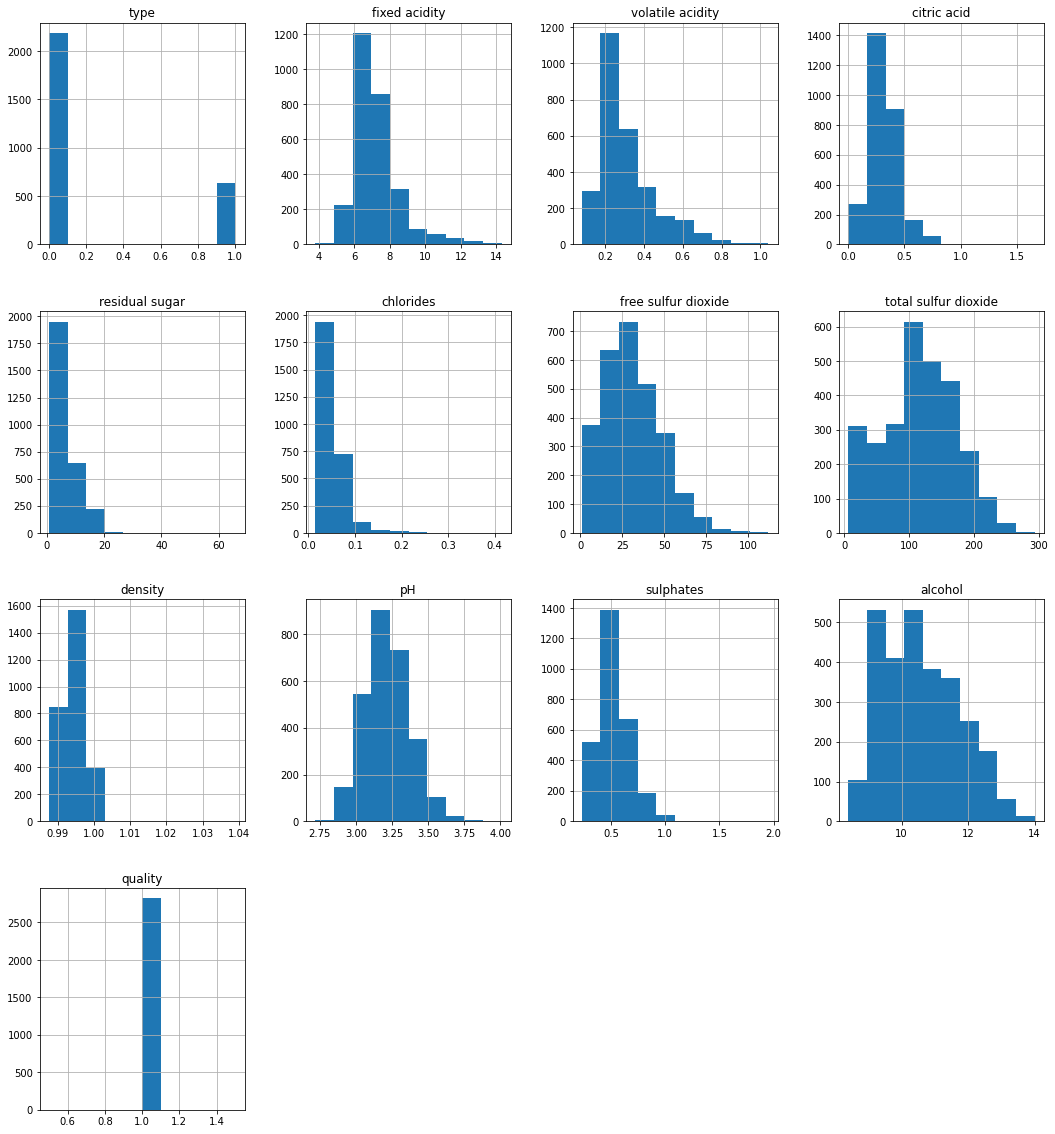

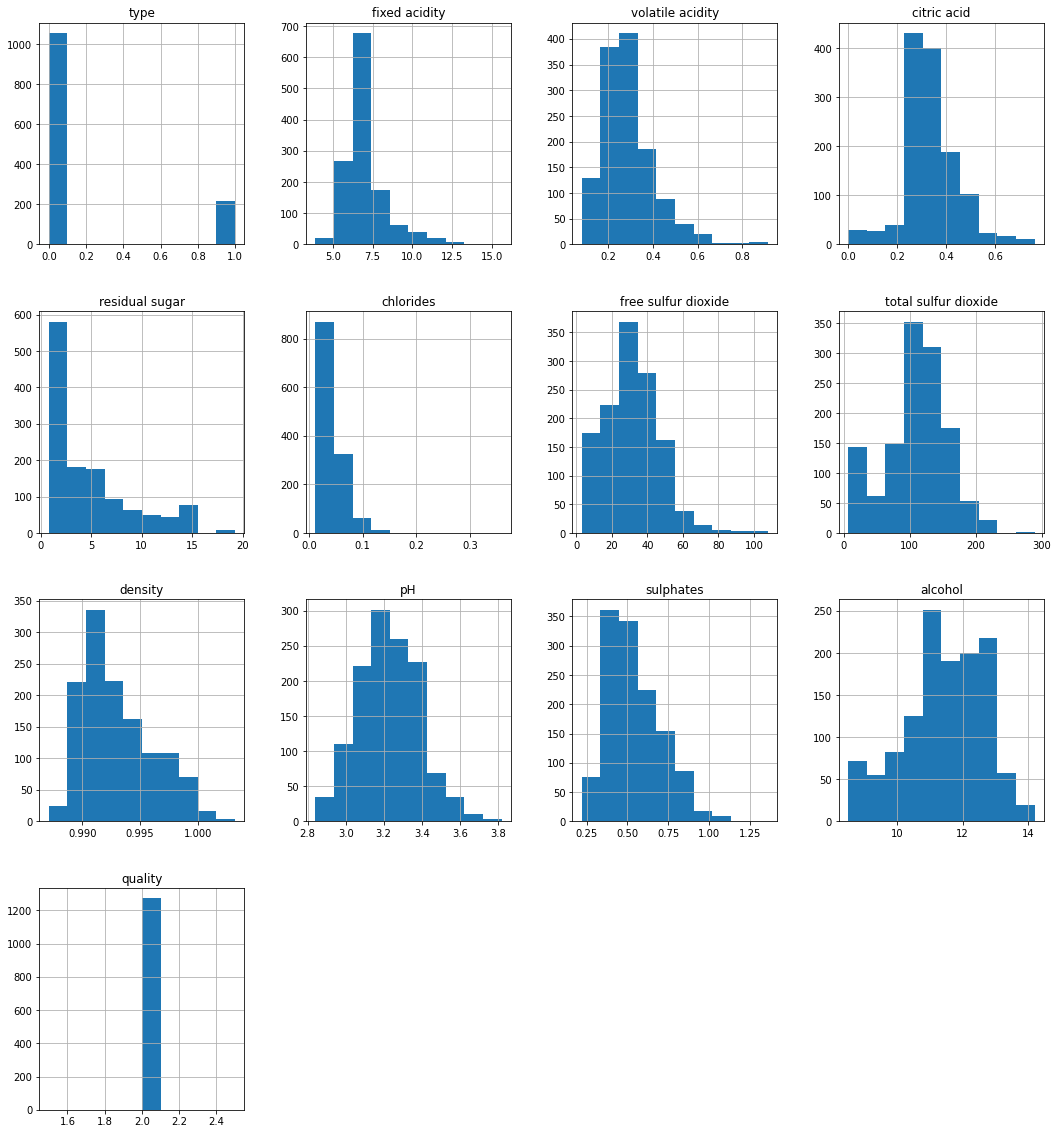

In [ ]:
#Check distribution of features data grouped by quality values
ax = df_alldata.groupby(['quality']).hist(bins=10, figsize=(18,20))
plt.show()

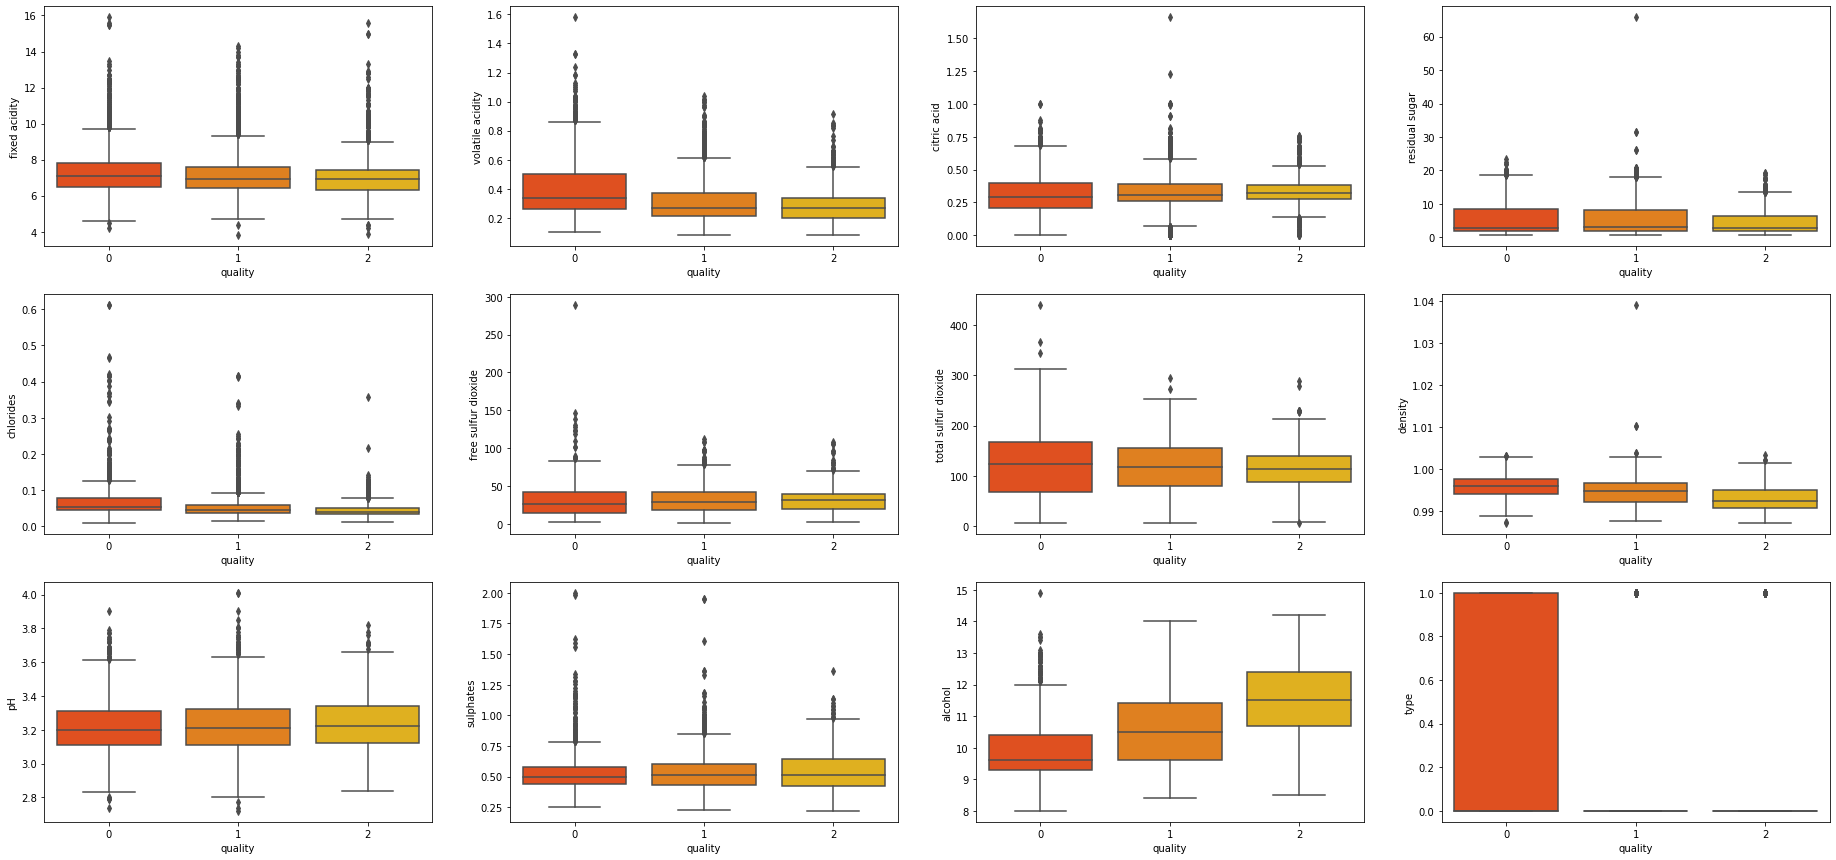

In [ ]:
#Check outliers
f, axes = plt.subplots(ncols=4,nrows=3, figsize=(32,15))
data=df_alldata
sns.boxplot(x='quality', y='fixed acidity', data=data, palette='autumn', ax=axes[0,0])
sns.boxplot(x='quality', y='volatile acidity', data=data, palette='autumn', ax=axes[0,1])
sns.boxplot(x='quality', y='citric acid', data=data, palette='autumn', ax=axes[0,2])
sns.boxplot(x='quality', y='residual sugar', data=data, palette='autumn', ax=axes[0,3])

sns.boxplot(x='quality', y='chlorides', data=data, palette='autumn', ax=axes[1,0])
sns.boxplot(x='quality', y='free sulfur dioxide', data=data, palette='autumn', ax=axes[1,1])
sns.boxplot(x='quality', y='total sulfur dioxide', data=data, palette='autumn', ax=axes[1,2])
sns.boxplot(x='quality', y='density', data=data, palette='autumn', ax=axes[1,3])

sns.boxplot(x='quality', y='pH', data=data, palette='autumn', ax=axes[2,0])
sns.boxplot(x='quality', y='sulphates', data=data, palette='autumn', ax=axes[2,1])
sns.boxplot(x='quality', y='alcohol', data=data, palette='autumn', ax=axes[2,2])
sns.boxplot(x='quality', y='type', data=data, palette='autumn', ax=axes[2,3])

plt.show()



*   In these following three columns; Residual sugar, Free sulfur dioxide, and density, we can notice significant or extreme outliers. These extreme outliers should be removed.



In [ ]:
#Remove Extreme Outliers
#Removing outliers in residual sugar
lower = df_alldata['residual sugar'].mean()-3*df_alldata['residual sugar'].std()
upper = df_alldata['residual sugar'].mean()+3*df_alldata['residual sugar'].std()
df_alldata = df_alldata[(df_alldata['residual sugar']>lower) & (df_alldata['residual sugar']<upper)]

#Removing outliers in free sulfur dioxide
lower = df_alldata['free sulfur dioxide'].mean()-3*df_alldata['free sulfur dioxide'].std()
upper = df_alldata['free sulfur dioxide'].mean()+3*df_alldata['free sulfur dioxide'].std()
df_alldata = df_alldata[(df_alldata['free sulfur dioxide']>lower) & (df_alldata['free sulfur dioxide']<upper)]

#Removing outliers in density
lower = df_alldata['density'].mean()-3*df_alldata['density'].std()
upper = df_alldata['density'].mean()+3*df_alldata['density'].std()
df_alldata = df_alldata[(df_alldata['density']>lower) & (df_alldata['density']<upper)]

df_alldata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6399 non-null   int64  
 1   fixed acidity         6399 non-null   float64
 2   volatile acidity      6399 non-null   float64
 3   citric acid           6399 non-null   float64
 4   residual sugar        6399 non-null   float64
 5   chlorides             6399 non-null   float64
 6   free sulfur dioxide   6399 non-null   float64
 7   total sulfur dioxide  6399 non-null   float64
 8   density               6399 non-null   float64
 9   pH                    6399 non-null   float64
 10  sulphates             6399 non-null   float64
 11  alcohol               6399 non-null   float64
 12  quality               6399 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 699.9 KB


#2.1 Visualize dataset

In [ ]:
for x_col in df_alldata.columns:
    fig = px.histogram(df_alldata, x=x_col, color="quality",title="x_col")
    fig.show()

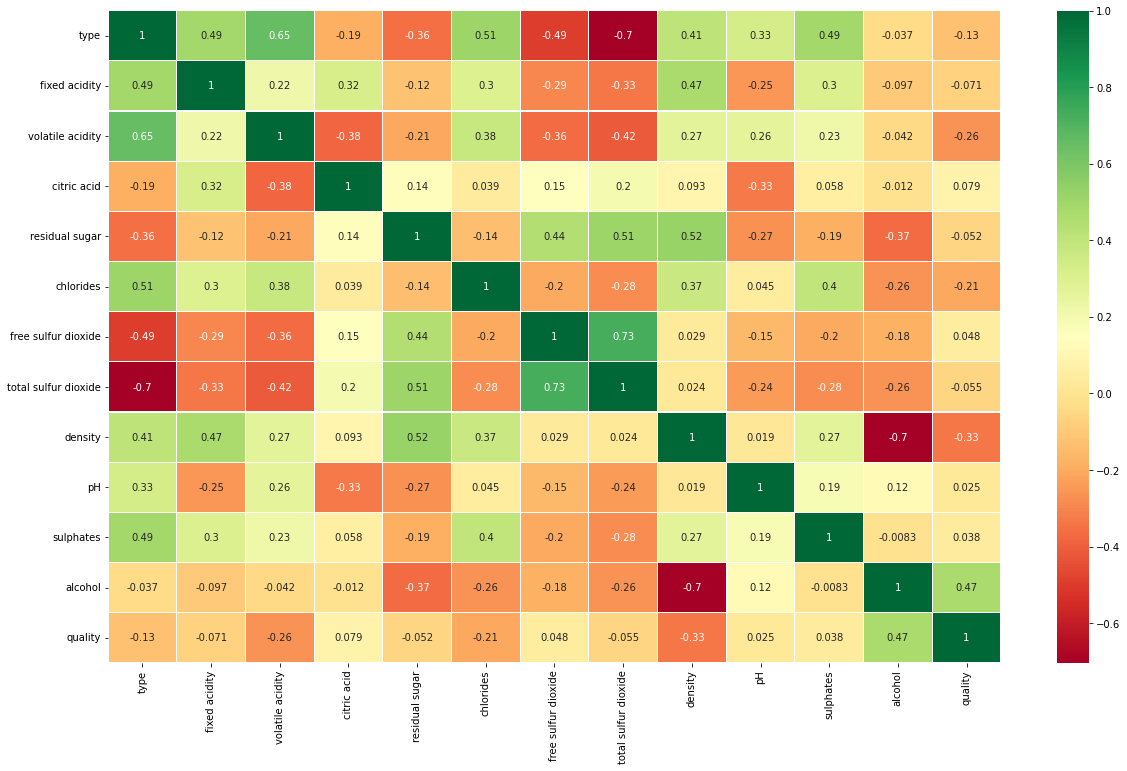

In [ ]:
sns.heatmap(df_alldata.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

#3. Data Pre-processing

##3.1) Encoding Categorical data

##3.2 Treating Imbalanced Dataset: Oversampling


*   As stated earlier that this wine quality group [0,1,2] data set is imbalanced, showing much less cases for high quality group [2]. 
*   The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.
*   In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
*   We will use random oversampling for this data set to prevent loss of information.


In [ ]:
#Check value counts in wine quality group
low = df_alldata[df_alldata['quality']==0]
med = df_alldata[df_alldata['quality']==1]
high = df_alldata[df_alldata['quality']==2]
print(low.shape)
print(med.shape)
print(high.shape)

(2346, 13)
(2789, 13)
(1264, 13)


In [ ]:
#Over-sampling
low_rand = low.sample(med.shape[0],replace = True)  # duplicates randomly *exit.shape[0] - stay.shape[0]* samples
high_rand = high.sample(med.shape[0],replace = True)

print(low_rand.shape)
print(med.shape)
print(high_rand.shape)

(2789, 13)
(2789, 13)
(2789, 13)


In [ ]:
#New dataset 
df_alldata2 = pd.concat([low_rand,med,high_rand],axis =0)
df_alldata2['quality'].value_counts()

0    2789
1    2789
2    2789
Name: quality, dtype: int64

In [ ]:
df_alldata2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
19,0,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,0
2415,0,8.2,0.24,0.30,2.3,0.050,23.0,106.0,0.99397,2.98,0.50,10.0,0
6160,1,9.8,0.45,0.38,2.5,0.081,34.0,66.0,0.99726,3.15,0.58,9.8,0
5930,1,8.1,0.82,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,0
1536,0,8.9,0.13,0.49,1.0,0.028,6.0,24.0,0.99260,2.91,0.32,9.9,0


##3.3 Splitting the Dataset into training and validate datasets

In [ ]:
#Split Train Test Data

from sklearn.model_selection import train_test_split
x_all=df_alldata
y_all=df_alldata[['quality']]

x_train, x_test, y_train, y_test = train_test_split(df_alldata, df_alldata[['quality']],train_size=0.8,stratify=df_alldata[['quality']],random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train[['quality']],train_size=0.875,stratify=y_train[['quality']],random_state=1)


#Explore Train & Test

for x_col in x_train.columns:
    

    fig = px.histogram(x_train, x=x_col, color='quality',title='Train')
    fig.show()
    fig = px.histogram(x_test, x=x_col, color='quality',title='Test')
    fig.show()
    fig = px.histogram(x_valid, x=x_col, color='quality',title='Validate')
    fig.show()


x_train=x_train.drop('quality',axis=1)
x_test=x_test.drop('quality',axis=1)
x_valid=x_valid.drop('quality',axis=1)

##3.4 Normalize data

In [ ]:
#Normalize data
scaler = StandardScaler()  
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 

In [ ]:
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

#4. Training with ML Models
*   Uses ML models in scikit-learn

In [ ]:
#Set Seed for each repetitive 
seednumber = [911,444,888]

In [ ]:
#ML Model


from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline


best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition','type'])
for i in range(3):
  print("******************************************************************")
  print("********   Repetitive" +str(i) + "  Set Seed = " + str(seednumber[i]))
  models = []
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('QDA', QuadraticDiscriminantAnalysis()))
  models.append(('AdaBoost', AdaBoostClassifier(random_state=seednumber[i])))
  models.append(('Bagging', BaggingClassifier(random_state=seednumber[i])))
  models.append(('Extra Trees Ensemble', ExtraTreesClassifier(random_state=seednumber[i])))
  models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=seednumber[i])))
  models.append(('Random Forest', RandomForestClassifier(random_state=seednumber[i])))
  models.append(('Ridge', RidgeClassifier(random_state=seednumber[i])))
  models.append(('SGD', SGDClassifier(random_state=seednumber[i])))
  models.append(('BNB', BernoulliNB()))
  models.append(('GNB', GaussianNB()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('MLP', MLPClassifier(random_state=seednumber[i])))
  models.append(('LSVC', LinearSVC(random_state=seednumber[i])))
  models.append(('DTC', DecisionTreeClassifier(random_state=seednumber[i])))
  models.append(('ETC', ExtraTreeClassifier(random_state=seednumber[i])))
  models.append(('XGB', XGBClassifier(objective='multi:softmax',num_class=3,eval_metric=['mlogloss'],random_state=seednumber[i])))
  models.append(('XGBRF', XGBRFClassifier(objective='multi:softmax',num_class=3,eval_metric=['mlogloss'],random_state=seednumber[i])))
  DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred=model.predict(x_test)
      s=accuracy_score(y_test,y_pred) #f1_score(y_test, model.predict(x_test), average='weighted') 

      trainscore=accuracy_score(y_train,model.predict(x_train))
      
      #score =  roc_auc_score(y_train, proba)

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': trainscore,'repetition' : i,'type' :'ML'}
      resultlist=resultlist.append(result, ignore_index = True)
      """
      fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()
      """
      print(  name+ " Accuracy =" + str(trainscore))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))
      
      if trainscore > best_valid:
          best_valid = trainscore
          best_model = model
          best_model_name = name

  print(f"Best model is {best_model_name}")

******************************************************************
********   Repetitive0  Set Seed = 911
LDA Accuracy =0.5818263005135075
LDA--- 0.03384089469909668 seconds ---
QDA Accuracy =0.5391828533154722
QDA--- 0.003908634185791016 seconds ---
AdaBoost Accuracy =0.5836124134851529
AdaBoost--- 0.3948678970336914 seconds ---
Bagging Accuracy =0.9814690779191784
Bagging--- 0.3983418941497803 seconds ---
Extra Trees Ensemble Accuracy =1.0
Extra Trees Ensemble--- 0.6554691791534424 seconds ---
Gradient Boosting Accuracy =0.7115427550792588
Gradient Boosting--- 2.6930854320526123 seconds ---
Random Forest Accuracy =1.0
Random Forest--- 0.7806971073150635 seconds ---
Ridge Accuracy =0.5762446974771154
Ridge--- 0.009571313858032227 seconds ---
SGD Accuracy =0.5405224380442063
SGD--- 0.048898935317993164 seconds ---
BNB Accuracy =0.47398972985041304
BNB--- 0.0037343502044677734 seconds ---
GNB Accuracy =0.47622237106496984
GNB--- 0.0025038719177246094 seconds ---
KNN Accuracy =0.73297611

4.1) Compare Model - Before Tuning

In [ ]:
# Compare Machine Learning

accResult=resultlist[["model","Acc"]].groupby("model").mean().reset_index()
print(resultlist[["model","Acc"]].groupby("model").agg(['mean','std','count']))
print("********************")
print("The best model is " + accResult[accResult['Acc']==max(accResult['Acc'])]['model'])

                           Acc                
                          mean       std count
model                                         
AdaBoost              0.583612  0.000000     3
BNB                   0.473990  0.000000     3
Bagging               0.984892  0.002998     3
DTC                   1.000000  0.000000     3
ETC                   1.000000  0.000000     3
Extra Trees Ensemble  1.000000  0.000000     3
GNB                   0.476222  0.000000     3
Gradient Boosting     0.711543  0.000000     3
KNN                   0.732976  0.000000     3
LDA                   0.581826  0.000000     3
LSVC                  0.579668  0.000258     3
MLP                   0.688398  0.004775     3
QDA                   0.539183  0.000000     3
Random Forest         1.000000  0.000000     3
Ridge                 0.576245  0.000000     3
SGD                   0.524373  0.020397     3
XGB                   0.678946  0.000000     3
XGBRF                 0.589194  0.001340     3
*************

In [ ]:
#accResult=resultlist[["model","Acc"]].groupby("model").mean().reset_index()
#print(accResult)
fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
fig.show()

fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
fig.show()

Confusion matrix from the best model

In [ ]:
# confusion matrix from the best model: Extra Tree Ensemble

ETE = ExtraTreesClassifier(n_estimators=1000)
ETE.fit(x_train,y_train)
test_mse = ETE.predict(x_test)

forest_pred = ETE.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT or Extra Tree Ensemble\n\n', classification_report(y_test, forest_pred))


 [[352 110   7]
 [ 84 432  42]
 [  5  97 151]]
CLASSIFICATION REPORT or Extra Tree Ensemble

               precision    recall  f1-score   support

           0       0.80      0.75      0.77       469
           1       0.68      0.77      0.72       558
           2       0.76      0.60      0.67       253

    accuracy                           0.73      1280
   macro avg       0.74      0.71      0.72      1280
weighted avg       0.74      0.73      0.73      1280



#4.2 Tuning Model
- Tune the best model: Extra Tree Ensemble Classifier ML Model

In [ ]:
h_n_estimator=range(100,2000,100)

best_score=0
best_n_estimator=0

MLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
for i in range(3):
  print("**************** Repetitive "+str(i)+" **")
  for n_e in h_n_estimator:
    start_time = time.time()
    clf = ExtraTreesClassifier(n_estimators=n_e,random_state=seednumber[i]).fit(x_train, y_train)
    end_time = time.time()
    s=accuracy_score(y_valid,clf.predict(x_valid)) #clf.score(x_test, y_test)
    MLTuneResult = {'parameter': 'n_estimators','parameter_value': n_e, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    MLTuneResultlist=MLTuneResultlist.append(MLTuneResult, ignore_index = True)
    
    print('n_estimator = '+str(n_e)+ "   Acc="+str(s))
    if s>best_score:
      best_score=s
      best_n_estimator=n_e

**************** Repetitive 0 **
n_estimator = 100   Acc=0.740625
n_estimator = 200   Acc=0.7359375
n_estimator = 300   Acc=0.746875
n_estimator = 400   Acc=0.75
n_estimator = 500   Acc=0.75
n_estimator = 600   Acc=0.746875
n_estimator = 700   Acc=0.746875
n_estimator = 800   Acc=0.7390625
n_estimator = 900   Acc=0.74375
n_estimator = 1000   Acc=0.7421875
n_estimator = 1100   Acc=0.746875
n_estimator = 1200   Acc=0.746875
n_estimator = 1300   Acc=0.7453125
n_estimator = 1400   Acc=0.746875
n_estimator = 1500   Acc=0.7453125
n_estimator = 1600   Acc=0.746875
n_estimator = 1700   Acc=0.7453125
n_estimator = 1800   Acc=0.7453125
n_estimator = 1900   Acc=0.7484375
**************** Repetitive 1 **
n_estimator = 100   Acc=0.7203125
n_estimator = 200   Acc=0.728125
n_estimator = 300   Acc=0.7359375
n_estimator = 400   Acc=0.7359375
n_estimator = 500   Acc=0.7359375
n_estimator = 600   Acc=0.734375
n_estimator = 700   Acc=0.7328125
n_estimator = 800   Acc=0.7328125
n_estimator = 900   Acc=0.73

In [ ]:
print('Best score =', best_score)
print('Best n_estimator =', best_n_estimator)

Best score = 0.7546875
Best n_estimator = 1700


In [ ]:


print(MLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std']).reset_index())





       parameter parameter_value       Acc             runtime          
                                      mean       std      mean       std
0   n_estimators             100  0.729167  0.010404  0.473143  0.019093
1   n_estimators             200  0.732812  0.004134  1.726353  1.021762
2   n_estimators             300  0.739583  0.006315  1.474366  0.067899
3   n_estimators             400  0.742708  0.007046  1.931337  0.076581
4   n_estimators             500  0.743229  0.007046  2.324240  0.070336
5   n_estimators             600  0.742188  0.006811  2.803827  0.064417
6   n_estimators             700  0.741667  0.007708  3.248341  0.064130
7   n_estimators             800  0.741146  0.009547  3.735985  0.111974
8   n_estimators             900  0.743750  0.007812  4.135856  0.068480
9   n_estimators            1000  0.740625  0.004134  4.676593  0.088368
10  n_estimators            1100  0.742188  0.006811  5.160439  0.093093
11  n_estimators            1200  0.743750  0.00826

#4.2 Compare Model after tuning

In [ ]:
FinalResultList= pd.DataFrame([], columns=['model', 'train time', 'inference time','Acc','repetition','type'])
MLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

for i in range(3):
  train_start_time = time.time()
  clf = ExtraTreesClassifier(n_estimators=best_n_estimator,random_state=seednumber[i]).fit(x_train, y_train)
  train_end_time = time.time()
  inference_start_time = time.time()
  s=clf.score(x_train, y_train)
  inference_end_time = time.time()
  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_train.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_valid, y_valid)
  inference_end_time = time.time()
  result = {'data set': 'validate', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_valid.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_test, y_test)
  inference_end_time = time.time()
  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_test.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)

  
  result = {'model': 'ExtraTreesClassifier', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'ML'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))

[[354 109   6]
 [ 91 430  37]
 [  4  98 151]]
[[351 112   6]
 [ 89 431  38]
 [  4  97 152]]
[[352 111   6]
 [ 88 431  39]
 [  4 100 149]]


In [ ]:
######################################################
## To fill result in Train vs Validation vs Test table
########################################################
print(MLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

   data set train time          inference time                 Acc            \
                  mean      std           mean       std      mean       std   
0      test   8.433757  0.27078       0.875974  0.016691  0.729427  0.001193   
1     train   8.433757  0.27078       2.445888  0.149929  1.000000  0.000000   
2  validate   8.433757  0.27078       0.581700  0.007275  0.745312  0.009375   

  records       
     mean  std  
0  1280.0  0.0  
1  4479.0  0.0  
2   640.0  0.0  


#5. Deep Learning Model

In [ ]:
!nvidia-smi -L
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-bace6258-e87b-9e94-c109-0b61ce543f0f)
TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


5.1) Change Data Type

In [ ]:
#Change data type into float32 which most DL frameworks use as a default
x_traindp = x_train.astype(np.float32)
x_testdp = x_test.astype(np.float32)
x_validdp = x_valid.astype(np.float32)

y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()
y_validdp = y_valid.to_numpy()

5.2) Create Networking Architecture

In [ ]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 3

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                416       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 3)                 9

5.3) Compile the Model

In [ ]:
#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

5.4) Tune Batch Size (32,64,128)

In [ ]:
h_batch_size=[32,64,128]

DLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
best_batch_number=h_batch_size[0]
best_s=0
for i in range(1):
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_batch_size:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=h_n, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_batch_number=h_n

    DLTuneResult = {'parameter': 'h_batch_size','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())
print('Best batch size = ' + str(best_batch_number))


Epoch 1/100
98/98 [==============================] - 4s 8ms/step - loss: 1.1348 - acc: 0.4421 - val_loss: 0.9717 - val_acc: 0.5342
Epoch 2/100
98/98 [==============================] - 1s 6ms/step - loss: 0.9585 - acc: 0.5180 - val_loss: 0.8900 - val_acc: 0.5826
Epoch 3/100
98/98 [==============================] - 0s 5ms/step - loss: 0.8993 - acc: 0.5563 - val_loss: 0.8507 - val_acc: 0.5952
Epoch 4/100
98/98 [==============================] - 1s 6ms/step - loss: 0.8763 - acc: 0.5719 - val_loss: 0.8288 - val_acc: 0.6190
Epoch 5/100
98/98 [==============================] - 1s 6ms/step - loss: 0.8581 - acc: 0.5780 - val_loss: 0.8249 - val_acc: 0.6064
Epoch 6/100
98/98 [==============================] - 0s 5ms/step - loss: 0.8507 - acc: 0.5742 - val_loss: 0.8231 - val_acc: 0.6079
Epoch 7/100
98/98 [==============================] - 1s 6ms/step - loss: 0.8393 - acc: 0.5758 - val_loss: 0.8114 - val_acc: 0.6064
Epoch 8/100
98/98 [==============================] - 1s 5ms/step - loss: 0.8237 - a

5.5) Tune Epoch (50,100,300)

In [ ]:
h_Epoch=[50,100,300]
best_Epoch=h_Epoch[0]
best_s=0


for i in range(1):
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_Epoch:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=h_n, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)
    if s>best_s:
      best_s=s
      best_Epoch=h_n


    DLTuneResult = {'parameter': 'h_epoch','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Epoch = ' + str(best_Epoch))

Epoch 1/50
25/25 [==============================] - 0s 11ms/step - loss: 0.3476 - acc: 0.8437 - val_loss: 1.3243 - val_acc: 0.6347
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3544 - acc: 0.8405 - val_loss: 1.3248 - val_acc: 0.6399
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3525 - acc: 0.8373 - val_loss: 1.3001 - val_acc: 0.6339
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3476 - acc: 0.8402 - val_loss: 1.3442 - val_acc: 0.6362
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3523 - acc: 0.8402 - val_loss: 1.3136 - val_acc: 0.6376
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3310 - acc: 0.8539 - val_loss: 1.3478 - val_acc: 0.6332
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3442 - acc: 0.8498 - val_loss: 1.3587 - val_acc: 0.6399
Epoch 8/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3520 - acc: 0.8

5.6) Tune Optimizer (Adam,Adamaz,Nadam)

In [ ]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 3

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K
h_optimizer=['Adam','Adamax','Nadam']
best_s=0
best_optimizer=h_optimizer[0]
for h_n in h_optimizer:
  # Compile with default values for both optimizer and loss
  model.compile( optimizer=h_n, loss='sparse_categorical_crossentropy', metrics=['acc'] )
  # Compile + hyperparameter tuning
  model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                        metrics=['acc'] 
                      )


  for i in range(1):
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=best_Epoch, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_optimizer=h_n


    DLTuneResult = {'parameter': 'optimizer','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Optimizer = ' + str(best_optimizer))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                416       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 3)                

5.7) Inference on Train, Validate, and Test dataset

In [ ]:
DLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 3

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer=best_optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  train_start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=best_Epoch, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  train_end_time = time.time()

  inference_start_time = time.time()
  y_pred = model.predict( x_traindp)
  inference_end_time = time.time()
  s=accuracy_score(y_traindp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_traindp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_validdp)
  inference_end_time = time.time()
  s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'validation', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_validdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_testdp)
  inference_end_time = time.time()
  s=accuracy_score(y_testdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_testdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)



  
  result = {'model': 'Deeplearning', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))





Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                416       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 3)                

In [ ]:
#################
## To fill in  Train vs Validation vs Test
#######################

print(DLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

     data set train time           inference time                 Acc  \
                    mean       std           mean       std      mean   
0        test  20.209099  1.466745       0.186459  0.004932  0.632552   
1       train  20.209099  1.466745       0.347590  0.082914  0.800253   
2  validation  20.209099  1.466745       0.131348  0.035950  0.626563   

            records       
        std    mean  std  
0  0.001626  1280.0  0.0  
1  0.042647  4479.0  0.0  
2  0.005634   640.0  0.0  


total 5236
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch98_valloss1.17.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch31_valloss1.09.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch20_valloss1.06.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch10_valloss1.05.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch06_valloss1.07.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch04_valloss1.07.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch03_valloss1.06.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch01_valloss1.04.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch86_valloss1.02.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch71_valloss0.98.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch17_valloss0.89.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch03_valloss0.86.hdf5
-rw-r--r-- 1 root root 45728 Sep  8 00:04 bestmodel_epoch01_vallo

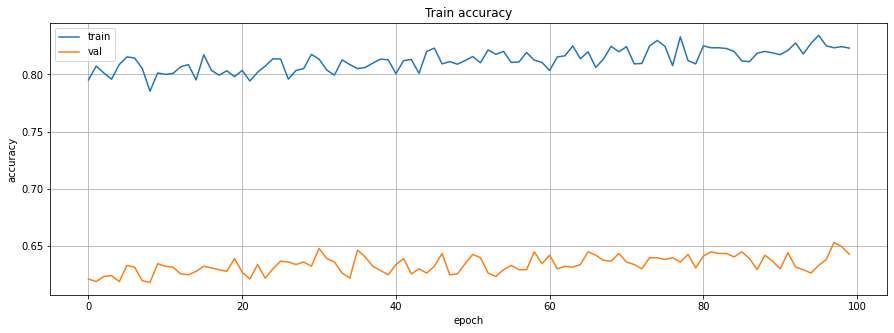

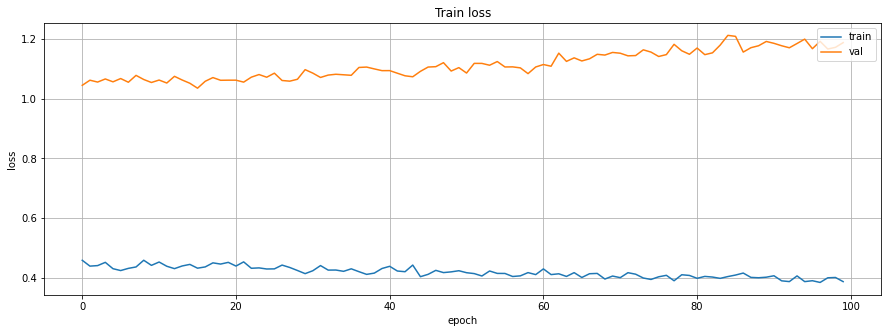

In [ ]:
#######################################################################
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

history.history.keys()
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

6) Compare all ML and DL Models

In [ ]:
#Compare ML result after tune


print(FinalResultList[['model','Acc','train time', 'inference time']].groupby('model').agg(['mean','std']))

fig = px.scatter(FinalResultList, x="train time", y="Acc", color="type",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models',symbol = 'model')
fig.show()


fig = px.box(FinalResultList, x="model", y="Acc", points="all",title="Acc score for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="train time", points="all",title="Train time for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="inference time", points="all",title="Inference time for ML model",color="type")
fig.show()

                           Acc           train time           inference time  \
                          mean       std       mean       std           mean   
model                                                                          
Deeplearning          0.632552  0.001626  20.209099  1.466745       0.186459   
ExtraTreesClassifier  0.729427  0.001193   8.433757  0.270780       0.875974   

                                
                           std  
model                           
Deeplearning          0.004932  
ExtraTreesClassifier  0.016691  
